In [1]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

import os, sys
parent = os.path.abspath('../..')

if not parent in sys.path: sys.path.append(parent)

from src.bradley_terry.bradley_terry import *
from src.utilities import *
from src.pairings import *

In [2]:
N = 500

/Users/fcrz/Code/projects/mvs/src/bradley_terry/bradley_terry.py:25: RuntimeWarning: invalid value encountered in scalar divide
  return W_i / D


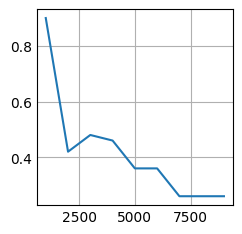

In [3]:
budget = range(1000, 10000, 1000)
L = [BradleyTerry(Random(N), b, rematch=3, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

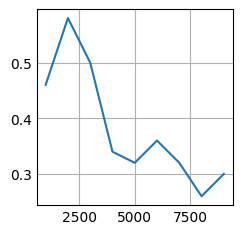

In [4]:
budget = range(1000, 10000, 1000)
L = [BradleyTerry(RandomCycles(N), b, rematch=3, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

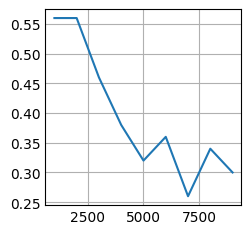

In [4]:
budget = range(1000, 10000, 1000)
L = [BradleyTerry(CCBiggest(N), b, rematch=3, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

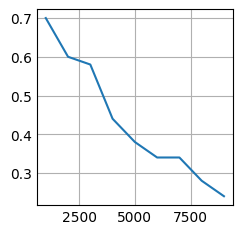

In [4]:
budget = range(1000, 10000, 1000)
L = [BradleyTerry(CCZip(N), b, rematch=3, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

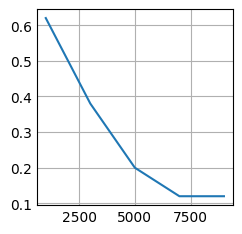

In [4]:
## SLOW! (19m37s to compute)

budget = range(1000, 10000, 2000)
L = [BradleyTerry(Reachability(N), b, rematch=3, p=0.9).score() for b in budget]

plt.plot(list(budget), L)
plt.show()

In [5]:
L

[0.62, 0.38, 0.19999999999999996, 0.12, 0.12]

In [3]:
BradleyTerry(Reachability(N), 5000, rematch=3, p=0.9).score()

# takes 2m40

0.19999999999999996

Bradley terry performs best when choosing pairings optimizing for reachability